# Spotify Final Project - Emily Xie EDA
### Milestone 3: EDA and Baseline Model
### Austin Rochon, Emily Xie, and Mark Lock

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setting up to query Google BigQuery

Since the data set is 70 million rows, and cannot all be easily managed on our local machines, we've decided to use GCP (Google Cloud Developer) platform to help us manage our data. First, we uploaded the CSVs into a private GCP  storage bucket, and from there sent the data to BigQuery, GCP's distributed database, which will allow us to query the data however we like.

Here's the interface (you need access): https://console.cloud.google.com/bigquery?folder=&organizationId=&project=spotted-d&p=spotted-d&d=playlist_songs&t=playlist_songs&page=table

From here, we can retrieve, query, join, and manipulate the entirety of the dataset however we like. Please follow the instructions below in this notebook to set up your Jupyter so that it can query directly from GCP. 

### Setup Instructions

The following setup should take just a few minutes.

#### 1. Create a service account. 
Go to https://console.cloud.google.com/iam-admin/serviceaccounts?project=spotted-d. Once you are on this page, go to the "actions" tab, where there will be a drop-down indicated by three dots on the right-most part of the corresponding account. Click "Create Key" which will download a key for you somewhere on your local machine. Save it somewhere safe. :-)  

If you plan to store it on this git project, make sure to put in a folder that is git-ignored so that we don't push it up to Github. I actually created a .gitignore file on this branch. If you create a directory called "config" under the top-level directory of this repository and stick your service key in there, it should be automatically ignored. Ask me if you want any help.

#### 2. Set up implicit authentication with gCloud
If you are using Mac, just run this on your command line:

`export GOOGLE_APPLICATION_CREDENTIALS="[PATH]"`

If you are using Windows:

`$env:GOOGLE_APPLICATION_CREDENTIALS="[PATH]"`

For more info, see below:

https://cloud.google.com/docs/authentication/getting-started#auth-cloud-implicit-python

It might be worth it to add this export line to your bash profile.

#### 3. Install Google Cloud Big Query Pandas python package.

Run this on your terminal:

`pip install --upgrade google-cloud-bigquery[pandas]`

For more on the above two steps, you can check out the GCP documentation: https://cloud.google.com/bigquery/docs/visualize-jupyter

#### Run this cell to load google cloud bigquery:

In [2]:
%load_ext google.cloud.bigquery

#### Now, you can query your data. Next to "bigquery", write the name of the variable you'd like to save your query results into.

In [ ]:
%%bigquery playlist_data
SELECT * FROM (
  SELECT 
  playlist.pid as pid,
  playlist.pos as pos,
  playlist.artist_name as artist_name,
  playlist.track_uri as track_uri,
  playlist.artist_uri as artist_uri,
  playlist.track_name as track_name,
  playlist.album_uri as album_uri,
  playlist.album_name as album_name,
  tracks.*,
  rand() as random
  FROM `spotted-d.playlist_songs.playlist_songs` playlist
  LEFT OUTER JOIN  `spotted-d.playlist_songs.tracks_headers` tracks ON playlist.track_uri = tracks.trackid
)
ORDER BY random
LIMIT 500000


#### You'll notice that it automatically saves to a Pandas dataframe for you

In [4]:
%%bigquery playlist_data_random
SELECT * FROM `spotted-d.playlist_songs.playlist_tracks_joined_random` LIMIT 500000

## EDA

In [6]:
playlist_data_random.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,index,danceability,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,trackid,random
0,330,2,Future Islands,spotify:track:0NCIwY63Lk4LLXeenFNzK6,spotify:artist:1WvvwcQx0tj6NdDhZZ2zZz,Sun in the Morning,spotify:album:1dKh4z5Aayt8FFDWjO5FDh,Singles,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,7.946244e-07
1,887,165,Drake,spotify:track:6kIh5c8x8vzOe6OKW1X59U,spotify:artist:3TVXtAsR1Inumwj472S9r4,Too Much,spotify:album:2gXTTQ713nCELgPOS0qWyt,Nothing Was The Same,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,1.850504e-06
2,866,32,Drake,spotify:track:6kIh5c8x8vzOe6OKW1X59U,spotify:artist:3TVXtAsR1Inumwj472S9r4,Too Much,spotify:album:2gXTTQ713nCELgPOS0qWyt,Nothing Was The Same,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,7.232236e-06
3,395,2,Lil Yachty,spotify:track:74hpFi8WyIwFIPBUv0idC3,spotify:artist:6icQOAFXDZKsumw3YXyusw,All In,spotify:album:1Ea4UfFW7K1UzbjkDVaPri,Summer Songs 2,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,8.270056e-06
4,559,85,Jess Best,spotify:track:7IWmeFL3tBSKxvLFotmWTb,spotify:artist:4pwfmguHmiuEmH1Xsw2NME,More,spotify:album:6GgvXc037WJHnOdVmDrtZP,Kid Again,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,1.348760e-05


In [7]:
playlist_data_random.groupby("pid").head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,index,danceability,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,trackid,random
0,330,2,Future Islands,spotify:track:0NCIwY63Lk4LLXeenFNzK6,spotify:artist:1WvvwcQx0tj6NdDhZZ2zZz,Sun in the Morning,spotify:album:1dKh4z5Aayt8FFDWjO5FDh,Singles,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,7.946244e-07
1,887,165,Drake,spotify:track:6kIh5c8x8vzOe6OKW1X59U,spotify:artist:3TVXtAsR1Inumwj472S9r4,Too Much,spotify:album:2gXTTQ713nCELgPOS0qWyt,Nothing Was The Same,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,1.850504e-06
2,866,32,Drake,spotify:track:6kIh5c8x8vzOe6OKW1X59U,spotify:artist:3TVXtAsR1Inumwj472S9r4,Too Much,spotify:album:2gXTTQ713nCELgPOS0qWyt,Nothing Was The Same,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,7.232236e-06
3,395,2,Lil Yachty,spotify:track:74hpFi8WyIwFIPBUv0idC3,spotify:artist:6icQOAFXDZKsumw3YXyusw,All In,spotify:album:1Ea4UfFW7K1UzbjkDVaPri,Summer Songs 2,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,8.270056e-06
4,559,85,Jess Best,spotify:track:7IWmeFL3tBSKxvLFotmWTb,spotify:artist:4pwfmguHmiuEmH1Xsw2NME,More,spotify:album:6GgvXc037WJHnOdVmDrtZP,Kid Again,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,1.348760e-05
5,52,25,Eli Young Band,spotify:track:4NFGPZQ6JA2thbhOdGm3t0,spotify:artist:6eKWqnckwdIlSnjaYgIyxv,On My Way,spotify:album:7DYy5TiODoqnZbZ2o6KcmV,Life At Best,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,2.027287e-05
6,798,25,Paddy And The Rats,spotify:track:4eoRLCJLnAQAInZPOMpcou,spotify:artist:3XquRQYlB1gXQkYdOV7S2x,Pilgrim on the Road,spotify:album:2ipeQ0EpiGh5GWpgjwkhoS,Hymns for Bastards,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,2.421246e-05
7,877,62,Anime Kei,spotify:track:7H0NozGXQodTfm4nm9CMAr,spotify:artist:0PMGIDR5OQokTICRFbNdeB,Ichirin No Hana - From 'Bleach',spotify:album:6zwpbUv7NsWFa7tJbWghjs,Ultimate Adventure Heroes (25 Awesome Otaku Fa...,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,3.881324e-05
8,346,30,Keith Urban,spotify:track:1Q8BwH9SLmp5kq8JeEh5qk,spotify:artist:0u2FHSq3ln94y5Q57xazwf,Sweet Thing,spotify:album:2FiijtcVKr2b6UJgar7Cdk,Defying Gravity,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,4.332684e-05
9,413,33,Chief Keef,spotify:track:4Tc1pmsTI3Z39KxnuRncV0,spotify:artist:15iVAtD3s3FsQR4w1v6M0P,Home,spotify:album:6ddJw3bbxM16cMX4uogNv1,Chiraq Villian,NaN,NaN,...,NaN,None,None,None,None,None,NaN,NaN,None,4.365195e-05


In [ ]:
counts_by_track = playlist_data.groupby(["trackid", "track_name", "artist_name"]).count()
counts_by_track["count_freq"] = counts_by_track["pid"]
counts_by_track[["count_freq"]].sort_values(by="count_freq", ascending=False)

In [8]:
group_by_playlist = playlist_data_random.groupby(["pid"]).count()

(array([  3.,   8.,  53., 132., 223., 271., 183.,  93.,  29.,   5.]),
 array([408. , 425.4, 442.8, 460.2, 477.6, 495. , 512.4, 529.8, 547.2,
        564.6, 582. ]),
 <a list of 10 Patch objects>)

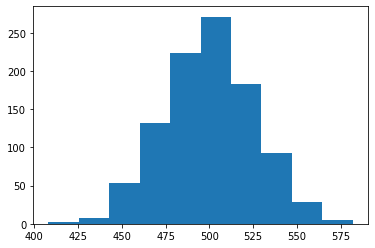

In [9]:
plt.hist(group_by_playlist["pos"])

In [10]:
random_csv = pd.read_csv("../data/songs786.csv")

In [12]:
random_csv_grouped = random_csv.groupby(["pid"]).count()

(array([291., 227., 172.,  97.,  63.,  58.,  29.,  19.,  27.,  17.]),
 array([  5. ,  29.4,  53.8,  78.2, 102.6, 127. , 151.4, 175.8, 200.2,
        224.6, 249. ]),
 <a list of 10 Patch objects>)

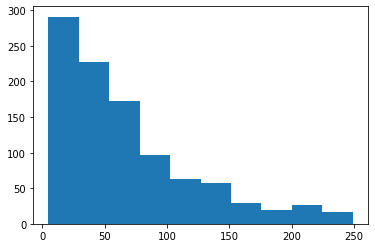

In [13]:
plt.hist(random_csv_grouped["pos"])